In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
pwd = os.getcwd()
df = pd.read_csv(
    r"C:\Users\Bronson Bagwell\Desktop\Finished projects\netflix\netflix_titles.csv"
)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.drop(["director", "cast", "description"], inplace=True, axis=1)
df.columns


Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
df["country"].mode()[0]


'United States'

In [15]:
df["country"] = df["country"].fillna(df["country"].mode()[0])


In [16]:
df.isnull().sum()


show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64

In [17]:
df[df["rating"].isnull()]


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows"
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies"
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas


In [18]:
df["rating"] = df["rating"].fillna("Unknown")


In [19]:
df[df["duration"].isnull()]


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [20]:
df.drop(df.loc[df["rating"] == "74 min"].index, inplace=True)
df.drop(df.loc[df["rating"] == "84 min"].index, inplace=True)
df.drop(df.loc[df["rating"] == "66 min"].index, inplace=True)


In [21]:
df = df[df["date_added"].notna()]


In [22]:
df.isnull().sum()


show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [23]:
df["year"] = df["date_added"].apply(lambda x: x.split(" ")[-1])
df["month"] = df["date_added"].apply(lambda x: x.split(" ")[0])


Text(0, 0.5, 'Count')

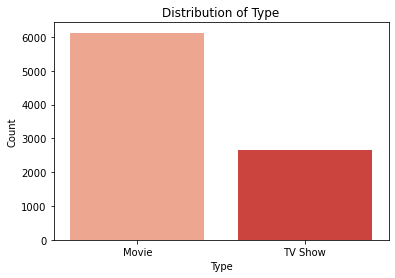

In [24]:
fig = sns.countplot(x="type", data=df, palette="Reds")
fig.set_title("Distribution of Type")
fig.set_xlabel("Type")
fig.set_ylabel("Count")


[Text(0.5, 1.0, 'Distribution of content by Country'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Country')]

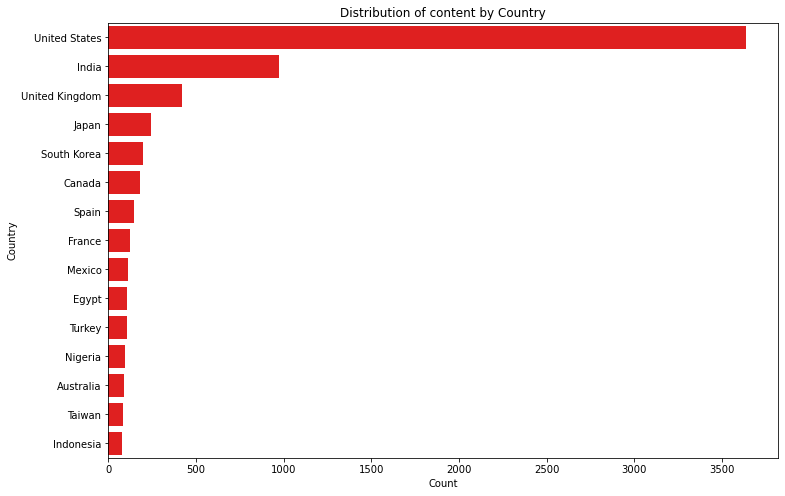

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y="country", data=df, order=df["country"].value_counts().index[0:15], color="Red"
).set(title="Distribution of content by Country", xlabel="Count", ylabel="Country")


[Text(0.5, 1.0, 'Distribution of content by Country'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Country')]

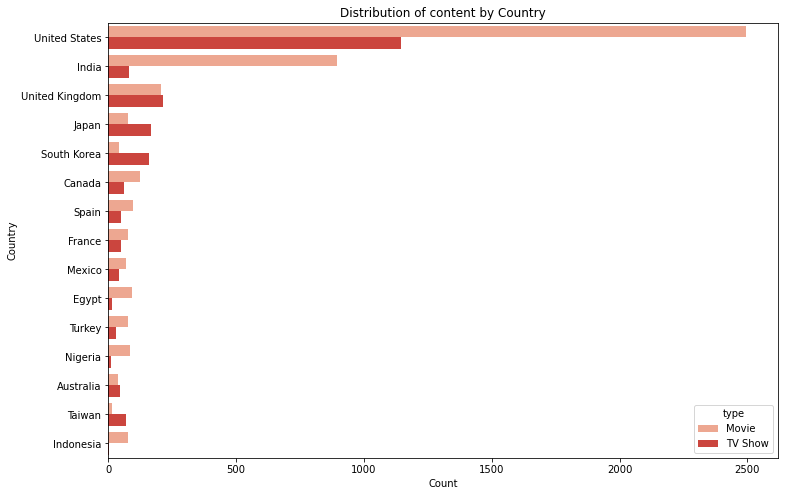

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y="country",
    hue=df.type,
    data=df,
    order=df["country"].value_counts().index[0:15],
    palette="Reds",
).set(title="Distribution of content by Country", xlabel="Count", ylabel="Country")



In [27]:
dfm = df[df["type"] == "Movie"]
dfm_year_oldest = dfm.sort_values("release_year", ascending=True)
dfm_year_oldest[["type", "title", "release_year"]][:15]


,type,title,release_year
8205,Movie,The Battle of Midway,1942
7790,Movie,Prelude to War,1942
8763,Movie,WWII: Report from the Aleutians,1943
8739,Movie,Why We Fight: The Battle of Russia,1943
8660,Movie,Undercover: How to Operate Behind Enemy Lines,1943
8419,Movie,The Memphis Belle: A Story of a\nFlying Fortress,1944
8436,Movie,The Negro Soldier,1944
8640,Movie,Tunisian Victory,1944
7219,Movie,Know Your Enemy - Japan,1945
7575,Movie,Nazi Concentration Camps,1945


In [28]:
dftv = df[df["type"] == "TV Show"]
dftv_year_oldest = dftv.sort_values("release_year", ascending=True)
dftv_year_oldest[["type", "title", "release_year"]][:15]


,type,title,release_year
4250,TV Show,Pioneers: First Women Filmmakers*,1925
1331,TV Show,Five Came Back: The Reference Films,1945
7743,TV Show,Pioneers of African-American Cinema,1946
8541,TV Show,The Twilight Zone (Original Series),1963
8189,TV Show,The Andy Griffith Show,1967
4550,TV Show,Monty Python's Fliegender Zirkus,1972
4551,TV Show,Monty Python's Flying Circus,1974
6549,TV Show,Dad's Army,1977
6674,TV Show,El Chavo,1979
7588,TV Show,Ninja Hattori,1981


[Text(0.5, 1.0, 'Distribution of content by release year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

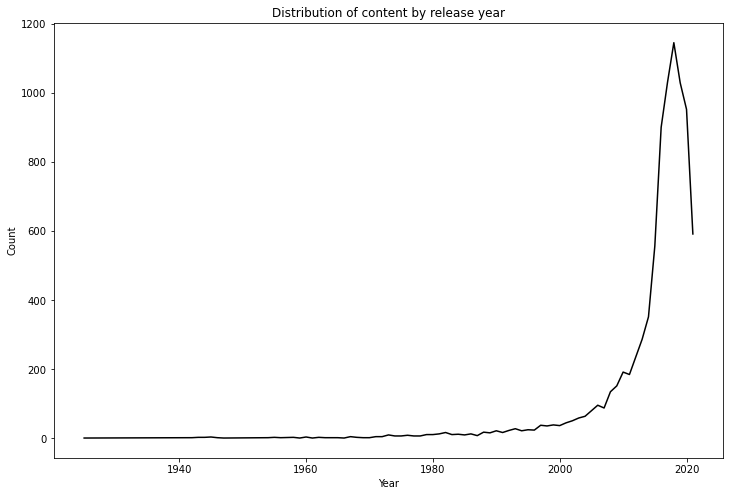

In [29]:
df_release_year = df["release_year"].value_counts()
plt.figure(figsize=(12, 8))
sns.lineplot(x=df_release_year.index, y=df_release_year.values, color="Black").set(
    title="Distribution of content by release year", xlabel="Year", ylabel="Count"
)


[Text(0.5, 1.0, 'Distribution of content by year added'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

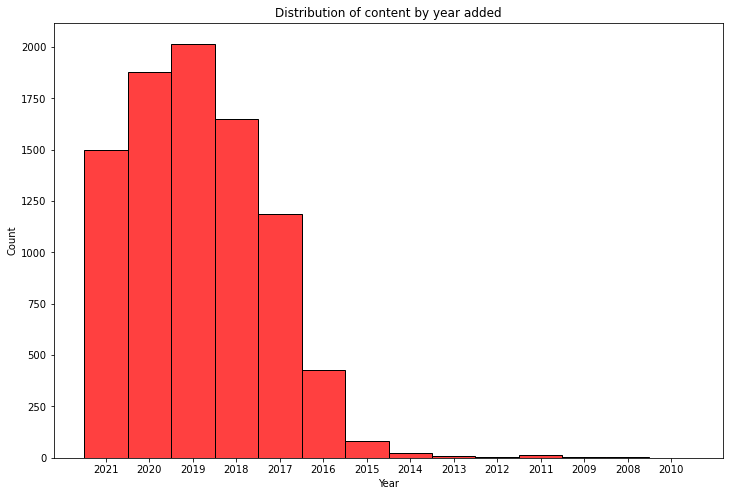

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(x="year", data=df, color="Red").set(
    title="Distribution of content by year added", xlabel="Year", ylabel="Count"
)


In [31]:
df["rating"].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'Unknown', 'TV-Y7-FV', 'UR'],
      dtype=object)

[Text(0.5, 1.0, 'Distribution of Ratings'),
 Text(0.5, 0, 'Ratings'),
 Text(0, 0.5, 'Count')]

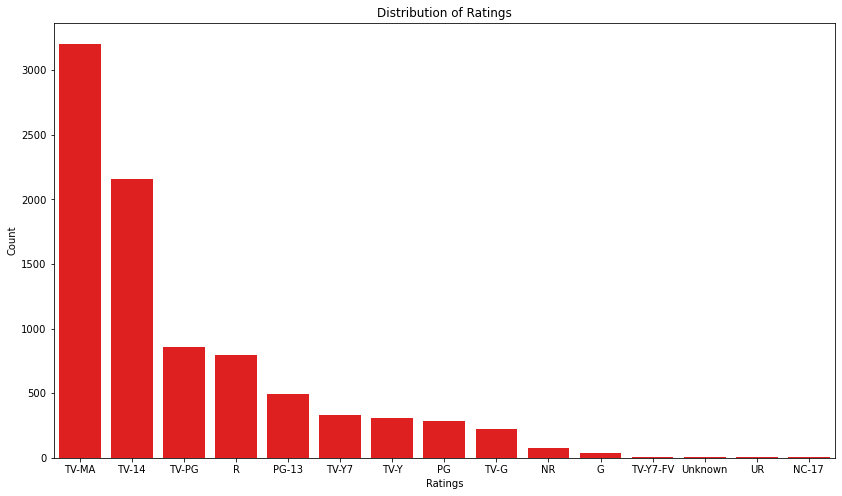

In [32]:
plt.figure(figsize=(14, 8))
sns.countplot(
    x="rating", data=df, order=df["rating"].value_counts().index[0:15], color="Red"
).set(title="Distribution of Ratings", xlabel="Ratings", ylabel="Count")


[Text(0.5, 1.0, 'Distribution of Ratings'),
 Text(0.5, 0, 'Ratings'),
 Text(0, 0.5, 'Count')]

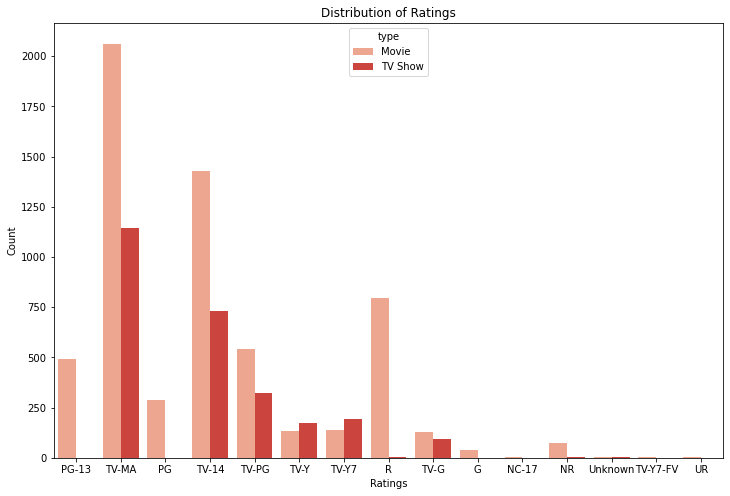

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x="rating", data=df, hue="type", palette="Reds").set(
    title="Distribution of Ratings", xlabel="Ratings", ylabel="Count"
)


In [34]:
dfm_genre = dfm["listed_in"].value_counts().reset_index().head(15)
dftv_genre = dftv["listed_in"].value_counts().reset_index().head(15)


[Text(0.5, 1.0, 'Top 15 Movie Genres'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Genre')]

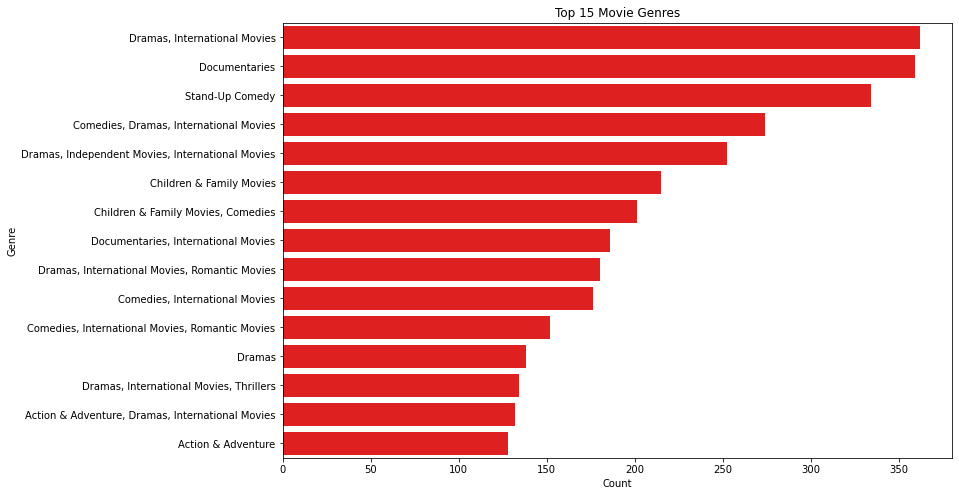

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(y="index", x="listed_in", data=dfm_genre, color="Red").set(
    title="Top 15 Movie Genres", xlabel="Count", ylabel="Genre"
)


[Text(0.5, 1.0, 'Top 15 TV Show Genres'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Genre')]

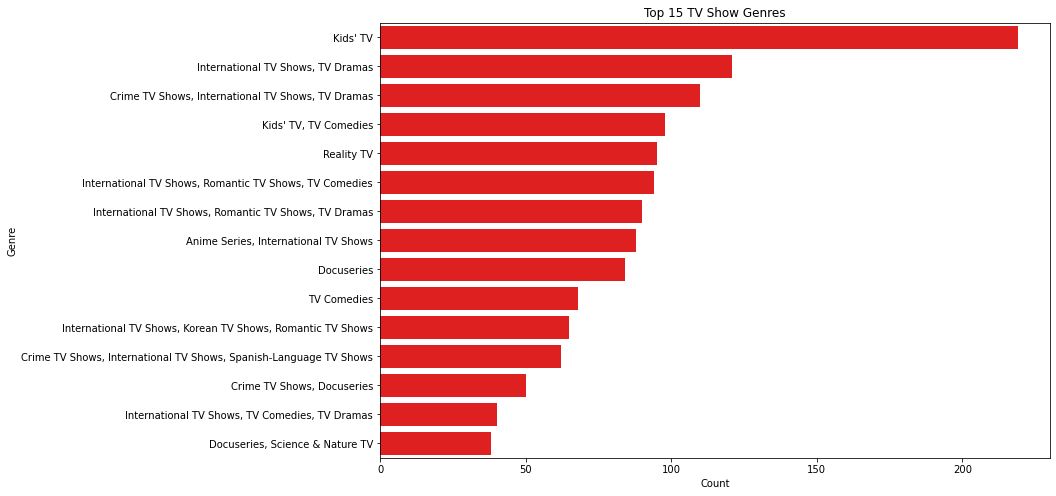

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(y="index", x="listed_in", data=dftv_genre, color="Red").set(
    title="Top 15 TV Show Genres", xlabel="Count", ylabel="Genre"
)
